图像分割小例子

In [80]:
from matplotlib.image import imread
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
image = imread('E:/ZhuoMianpicture/me.png')#换成jpg就会有问题
#image

In [81]:
#image.shape
X = image.reshape(-1,4)#列数固定，行数自动计算，d=a*b/m
#X.shape

In [82]:
kmeans = KMeans(n_clusters=8, random_state=43).fit(X)
kmeans.cluster_centers_#获得8个中心点

array([[0.64605594, 0.47210017, 0.38236734, 1.        ],
       [0.9991718 , 0.9976833 , 0.99809456, 1.        ],
       [0.10810703, 0.10084391, 0.10057074, 1.        ],
       [0.8867453 , 0.7093582 , 0.6248767 , 1.        ],
       [0.9388013 , 0.91938365, 0.92020696, 1.        ],
       [0.7930545 , 0.6091558 , 0.5115764 , 1.        ],
       [0.43016577, 0.43058932, 0.51212   , 1.        ],
       [0.32415473, 0.2745279 , 0.28736848, 1.        ]], dtype=float32)

In [83]:
kmeans.labels_#每个数据点属于哪一个簇的标签，0、1、2、3、4、5、6、7共8个簇

array([1, 1, 1, ..., 4, 4, 4])

In [84]:
fenge_img = kmeans.cluster_centers_[kmeans.labels_]#获取kmeans算法分割后的图像，以数组形式存储
#fenge_img

In [85]:
fenge_img = fenge_img.reshape(image.shape)
#fenge_img

Text(0.5, 1.0, 'fenge image')

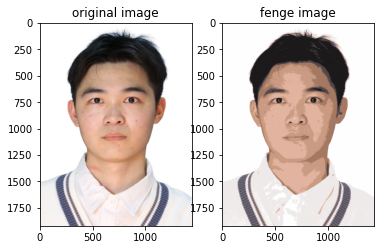

In [86]:
plt.figure()
plt.subplot(121)
plt.imshow(image)#展示原始图像
plt.title('original image')
plt.subplot(122)
plt.imshow(fenge_img)#展示分割算法分割的图像
plt.title('fenge image')

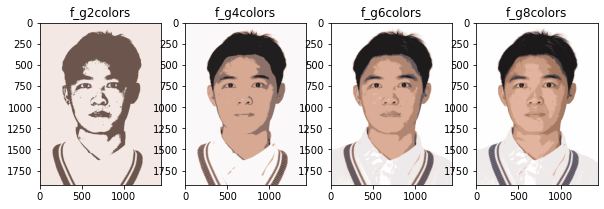

In [87]:
n_color=(2,4,6,8)
fenge_imgs=[]
for k in n_color:
    kmeans = KMeans(n_clusters=k, random_state=43).fit(X)#使用k-means算法,设置参数,对二维数据x进行处理
    fenge_img = kmeans.cluster_centers_[kmeans.labels_]  #取k-means算法得到的k个中心点，对每一个数据根据标签分类采用中心点来存储
    fenge_imgs.append(fenge_img.reshape(image.shape))    #至于为什么用中心点来表示数据并且更换一下数据维数就能重新构造一张图
plt.figure(figsize=(10,5))
for j,k in enumerate(n_color):
    plt.subplot(141+j)
    plt.imshow(fenge_imgs[j])#展示分割算法分割的图像
    plt.title('f_g{}colors'.format(k))